In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

from imageio import imread, imsave
from cv2 import IMREAD_GRAYSCALE
from skimage.color import rgb2gray, rgba2rgb
from skimage.feature import canny
from skimage.morphology import binary_opening, binary_closing
from skimage.measure import regionprops
from skimage.measure import label as sk_measure_label
from skimage.filters import sobel, gaussian, threshold_local, try_all_threshold, threshold_otsu, threshold_minimum
from scipy.ndimage import binary_fill_holes

# Обработка и получение масок 10 изображений

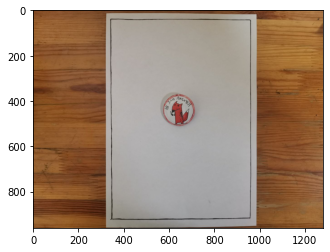

In [25]:
# Функция для загрузки изображений
def im_upload(directory):
    images = []
    for file in os.listdir(directory):
        images.append(imread(os.path.join(directory,file)))
    return images

dir_iteams = 'iteams'
im = im_upload(dir_iteams)
plt.imshow(im[1])


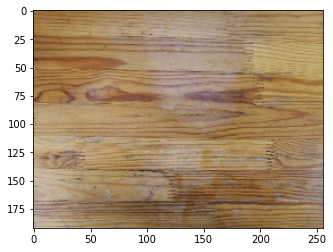

In [26]:
# Функция сжатия
def im_comp(images, scale_percent):
    icomp = []
    for image in images:
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        new_size = (width, height)
        icomp.append(cv2.resize(image, new_size))
    return icomp

sperc = 20 # степень сжатия
c = im_comp(im, sperc)
plt.imshow(c[0])

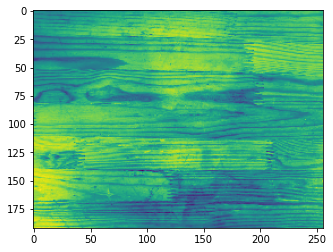

In [34]:
# Функция перевода в черно-белый формат
def set_grayscale(images):
    grayscale_images = []
    
    for img in images:
        #gray_image = rgb2gray(img)
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        grayscale_images.append(gray_image)

    return grayscale_images

g = set_grayscale(c)
plt.imshow(g[0])


(-0.5, 255.5, 192.5, -0.5)

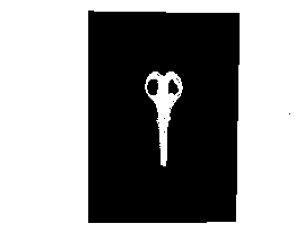

In [37]:
# Бинаризация
def binary_otsu(images):
    bin_images = []
    
    for img in images:
        thresh_otsu = threshold_otsu(img)
        bin_images.append(img <= thresh_otsu)

    return bin_images

im_otsu = binary_otsu(g)
plt.imshow(im_otsu[9], cmap='gray')
plt.axis('off')

(-0.5, 255.5, 199.5, -0.5)

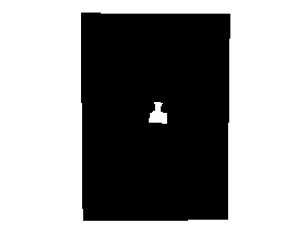

In [43]:
# Морфологические операции
def morpholog(images):
    bin_open_images = []
    for img in images:
        bin_open_images.append(binary_closing(img, footprint=np.ones((5, 5))))
    
    return bin_open_images


im_otsu_open = morpholog(im_otsu)
plt.imshow(im_otsu_open[6], cmap='gray')
plt.axis('off')

In [ ]:
# Получаем маски предметов
def get_mask():
    mask_images = []
    # def get_largest_component(mask):
#     labels = sk_measure_label(mask) # разбиение маски на компоненты связности
#     props = regionprops(labels) # нахождение свойств каждой области (положение центра, площадь, bbox, интервал интенсивностей и т.д.)
#     areas = [prop.area for prop in props] # нас интересуют площади компонент связности

#     print("Значения площади для каждой компоненты связности: {}".format(areas))
#     largest_comp_id = np.array(areas).argmax() # находим номер компоненты с максимальной площадью

#     print("labels - матрица, заполненная индексами компонент связности со значениями из множества: {}".format(np.unique(labels)))
#     return labels == (largest_comp_id + 1) # области нумеруются с 1, поэтому надо прибавить 1 к индексу

    return mask_images

# Обрезаем изображения по маскам


# Поиск многоугольника и предметов на входном изображении


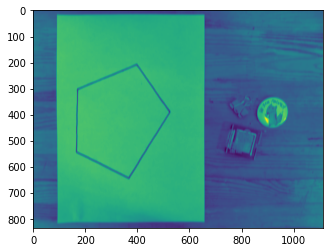

In [76]:
# Загрузка, сжатие, сглаживание и перевод в черно-белый формат
def loading_and_preprocessing(directory, scale_percent):
    images = []
    
    for file in os.listdir(directory):
        image = imread(os.path.join(directory,file))
        
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        new_size = (width, height)
        icomp = cv2.resize(image, new_size)
        
        # сглаживание Гауссом
        igauss = gaussian(icomp, sigma=3, channel_axis=100)
        
        images.append(rgb2gray(igauss))
        
    return images

dir_case = 'case'
sperc = 87
images = loading_and_preprocessing(dir_case, sperc)

plt.imshow(images[8])

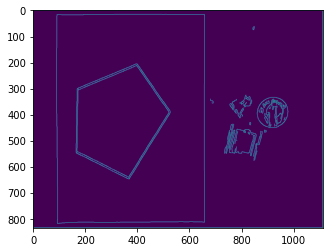

In [77]:
# Используем детектор Кэнни для поиска границ объектов
def search_for_boundaries(images):
    canny_images = []
    canny_sigma = 0.2
    canny_low_threshold = 0.055
    high_threshold = 0.20
    
    for image in images:
        canny_images.append(canny(image))#, sigma=canny_sigma, low_threshold=low_threshold, high_threshold=high_threshold))
    return canny_images

can_im = search_for_boundaries(images)

plt.imshow(can_im[8])

In [ ]:
# Найти маску объектов

Выделение масок доделаю в ближайшее время, также буду думать как устранить шумы при применении фильтра Canny
Правильное оформление кода будет представлена, когда будут подготовлены ключевые функции